1. Loading the dataset

In [1]:
# 1.1. Launch commands to automatically reload modules
%load_ext autoreload
%autoreload 2

In [2]:
# 1.2. Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [3]:
# 1.3. Load the training, validation and test datasets into a dataframes 
# Load the Parquet files into DataFrames
X_train = pd.read_parquet('../data/processed/X_train.parquet')
X_val = pd.read_parquet('../data/processed/X_val.parquet')
y_train = pd.read_parquet('../data/processed/y_train.parquet')
y_val = pd.read_parquet('../data/processed/y_val.parquet')
X_test = pd.read_parquet('../data/processed/test_cleaned.parquet')

In [4]:
# taking out the player id out of the test data
player_id_test = X_test.pop('player_id')

In [5]:
y_val = y_val.iloc[:, 0]  # Convert the single column DataFrame to a Series
y_val.shape

(9324,)

In [6]:
y_train = y_train.iloc[:, 0]  # Convert the single column DataFrame to a Series
y_train.shape

(37294,)

3. Logistic Regression - Modelling

In [7]:
#3.1 Import RandomForestClassifier and instantiate the model
from sklearn.linear_model import LogisticRegression
lg_1 = LogisticRegression()


In [8]:
# 3.2 Train the model and save the predicted values
lg_1.fit(X_train, y_train)
y_train_probs_lg1 = lg_1.predict_proba(X_train)
y_val_probs_lg1 = lg_1.predict_proba(X_val)

# Select the probability for the positive class (class 1)
y_train_probs_lg1 = y_train_probs_lg1[:, 1]
y_val_probs_lg1 = y_val_probs_lg1[:, 1]

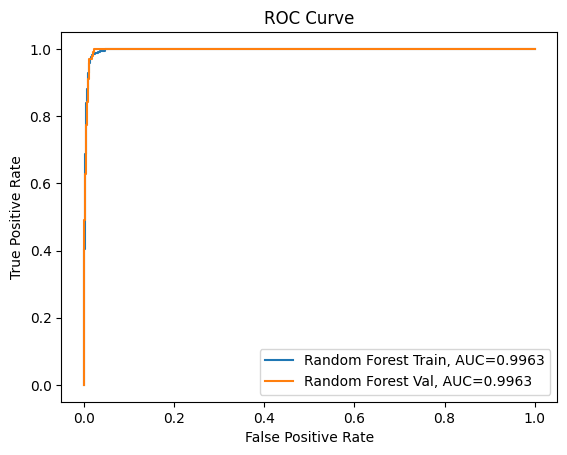

In [9]:
# 3.3 To plot ROC curve and the AUC metric - for comparison of model performances
#To plot ROC curve and the AUC metric
from sklearn import metrics

# Set up plotting area
plt.figure(0).clf()

# Random Forest - Train
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_probs_lg1)
auc = round(metrics.roc_auc_score(y_train, y_train_probs_lg1), 4)
plt.plot(fpr, tpr, label="Random Forest Train, AUC="+str(auc))

# Random Forest - Validation
fpr, tpr, _ = metrics.roc_curve(y_val, y_val_probs_lg1)
auc = round(metrics.roc_auc_score(y_val, y_val_probs_lg1), 4)
plt.plot(fpr, tpr, label="Random Forest Val, AUC="+str(auc))

# Add legend
plt.legend()

# Show the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [10]:
# 3.4 Save the probability of the test data
y_test_prob_lg1 = lg_1.predict_proba(X_test)

# Select the probability for the positive class (class 1)
y_test_prob_lg1 = y_test_prob_lg1[:, 1]


In [11]:
# 3.5 add the 'player_id'column  into the prediction probability
# Convert y_test_prob_rf3 (which is a NumPy array) to a DataFrame
y_test_prob_df = pd.DataFrame(y_test_prob_lg1, columns=['drafted'])

# Concatenate player_id_test and y_test_prob_df along the columns
Results_1 = pd.concat([player_id_test, y_test_prob_df], axis=1)

In [12]:
Results_1

,player_id,drafted
0,23549e01-c1b3-4ca0-a0fd-de9b5d76276b,2.377022e-07
1,52a518bb-b34a-4b43-adee-5e996cb853fa,2.479017e-05
2,ad3d9117-b6bf-4675-ab97-3497acf3e555,9.431043e-05
3,eaf66a5c-6f4c-4070-bc70-a99d731b3740,4.269524e-05
4,55d07491-5bd1-447f-844e-9cb36eaa442e,3.364844e-05
...,...,...
4965,28222513-8a1f-4a48-8fde-16888e9e11ce,7.948008e-13
4966,c32a466d-7a66-47eb-805c-a94e328261bc,3.053243e-04
4967,55f0ddef-9f29-47ae-87b5-da43c687d25c,8.492604e-07
4968,460d6a42-5dbc-48f0-bc94-3650da83f345,6.428662e-08


In [13]:
#3.6 save the probability as CSV file

# Convert to DataFrame and save
pd.DataFrame(Results_1).to_csv('../data/external/Results.csv', index=False)

#3.7 save the model
# Import dump from joblib
from joblib import dump

# 3.12 Save the model and call the files respectively randomForest.joblib 
dump(lg_1, '../models/logisticRegression.joblib')


['../models/logisticRegression.joblib']